# Geoprocesamiento II

In [1]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import shapely.speedups

In [2]:
import shapely
shapely.__version__

'1.8.4'

In [3]:
os.chdir(r"D:\PYTHON\sig_python\Datos_Espaciales")

In [4]:
# Read files
poly1 = gpd.read_file("Geoprocesamiento/POLIGONO1.shp")
poly2 = gpd.read_file("Geoprocesamiento/POLIGONO2.shp")
Distrito = gpd.read_file("Formato/SHP/Distrito_Ucayali.shp")

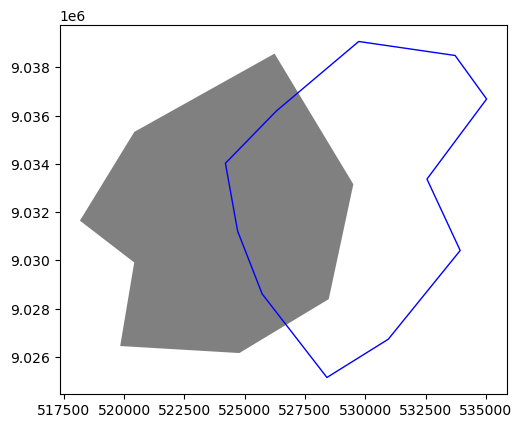

In [5]:
# Plot the layers
ax = poly1.plot(facecolor='gray')
poly2.plot(ax=ax, facecolor='None', edgecolor='blue')
plt.show()

In [6]:
# Check the crs of the municipality polygon
print(poly2.crs)

epsg:32718


In [15]:
# Ensure that the CRS matches, if not raise an AssertionError
assert poly2.crs == poly1.crs, "CRS differs between layers!!"

## Interseccion

In [16]:
intersection = gpd.overlay(poly1, poly2, how='intersection')

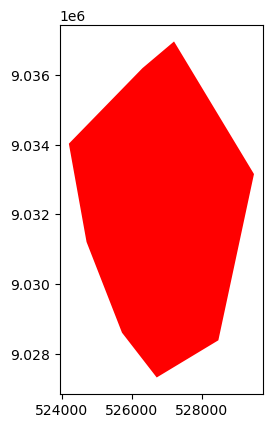

In [17]:
intersection.plot(color="red")
plt.show()

In [18]:
intersection.head(3)

,id_1,Nombre_1,id_2,Nombre_2,geometry
0,1,GEOMATICA,1,AMBIENTAL,"POLYGON ((527212.850 9036953.181, 529502.761 9..."


In [19]:
# Use GeoJSON driver
intersection.to_file("Resultado/Inteseccion.geojson", driver="GeoJSON")

C:\Users\Bismar\.conda\envs\sig_python\lib\site-packages\geopandas\io\file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [20]:
list(intersection.columns)

['id_1', 'Nombre_1', 'id_2', 'Nombre_2', 'geometry']

## Disolver

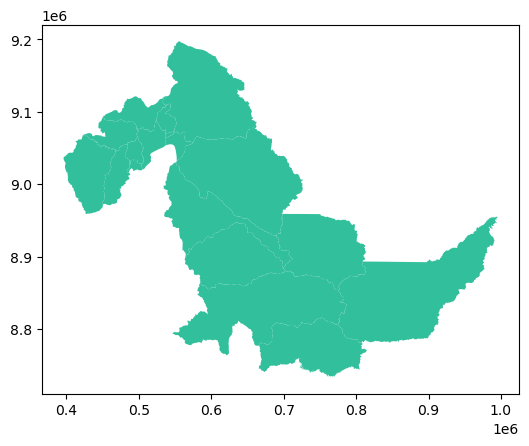

In [21]:
Distrito.plot(color="#31bf9c")
plt.show()

In [22]:
Distrito.head(3)

,OBJECTID,SHAPE_Leng,SHAPE_Area,ZONUTM,FUENTE,OBSERV,DOCREG,FECREG,ORIGEN,NOMDIS,NOMPRO,NOMDEP,LEYCRE,FECCRE,SUPSIG,UBIGEO,geometry
0,2.0,846966.904411,1.456490e+10,18,Gobierno Regional Ucayali,None,Ley de creación,None,2,250201,2502,25,LEY 6251,1928/10/22 00:00:00.000,1456490.000,250201,"POLYGON ((709089.500 8879380.000, 709388.125 8..."
1,3.0,430997.380855,7.659283e+09,18,Gobierno Regional Ucayali,None,Ley de creación,None,2,250203,2502,25,LEY 9815,1943/07/02 00:00:00.000,765928.250,250203,"POLYGON ((637909.956 8945148.739, 637913.399 8..."
2,4.0,866293.074394,1.845954e+10,18,Gobierno Regional Ucayali,None,Ley de creación,None,2,250401,2504,25,LEY 30720,2018/01/11 00:00:00.000,1845954.125,250401,"POLYGON ((993808.480 8955074.597, 993816.750 8..."


In [23]:
len(Distrito)

17

In [24]:
print(list(Distrito.columns))

['OBJECTID', 'SHAPE_Leng', 'SHAPE_Area', 'ZONUTM', 'FUENTE', 'OBSERV', 'DOCREG', 'FECREG', 'ORIGEN', 'NOMDIS', 'NOMPRO', 'NOMDEP', 'LEYCRE', 'FECCRE', 'SUPSIG', 'UBIGEO', 'geometry']


In [25]:
# Conduct the aggregation
provincia = Distrito.dissolve(by='NOMPRO')
departamento = Distrito.dissolve(by='NOMDEP')
# What did we get
provincia.head(3)

,geometry,OBJECTID,SHAPE_Leng,SHAPE_Area,ZONUTM,FUENTE,OBSERV,DOCREG,FECREG,ORIGEN,NOMDIS,NOMDEP,LEYCRE,FECCRE,SUPSIG,UBIGEO
NOMPRO,,,,,,,,,,,,,,,,
2501,"POLYGON ((689025.037 8929027.723, 689038.130 8...",7.0,143063.509660,6.599271e+08,18,Gobierno Regional Ucayali,None,Ley de creación,None,2,250107,25,LEY 28753,2006/06/06 00:00:00.000,6.597909e+04,250107
2502,"POLYGON ((775096.750 8805805.000, 775096.893 8...",2.0,846966.904411,1.456490e+10,18,Gobierno Regional Ucayali,None,Ley de creación,None,2,250201,25,LEY 6251,1928/10/22 00:00:00.000,1.456490e+06,250201
2503,"POLYGON ((504800.631 9028201.384, 504800.338 9...",13.0,85919.348494,2.086686e+08,18,Gobierno Regional Ucayali,None,Ley de creación,None,2,250305,25,LEY 30310,2015/03/17 00:00:00.000,2.086686e+04,250305


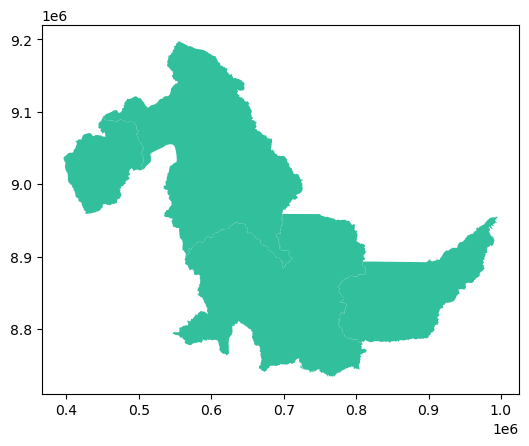

In [26]:
provincia.plot(color="#31bf9c")
plt.show()

In [27]:
print("Numero de poligonos distrito:" ,len(Distrito))
print("Numero de poligonos provincia:",len(provincia))

Numero de poligonos distrito: 17
Numero de poligonos provincia: 4


In [28]:
print(list(provincia.columns))

['geometry', 'OBJECTID', 'SHAPE_Leng', 'SHAPE_Area', 'ZONUTM', 'FUENTE', 'OBSERV', 'DOCREG', 'FECREG', 'ORIGEN', 'NOMDIS', 'NOMDEP', 'LEYCRE', 'FECCRE', 'SUPSIG', 'UBIGEO']


In [29]:
provincia.index

Index(['2501', '2502', '2503', '2504'], dtype='object', name='NOMPRO')

In [30]:
provincia.crs.name

'WGS 84 / UTM zone 18S'

In [31]:
# Create a GeoDataFrame
selection = gpd.GeoDataFrame([provincia.loc["2504"]], crs=provincia.crs)

<AxesSubplot:>

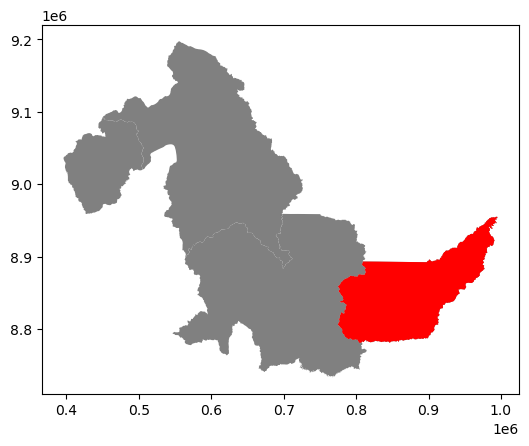

In [32]:
# Plot all the grid cells, and the grid cells that are 15 minutes a way from the Railway Station
ax = provincia.plot(facecolor='gray')
selection.plot(ax=ax, facecolor='red')

## Union

In [33]:
Union = gpd.overlay(poly1, poly2, how='union')

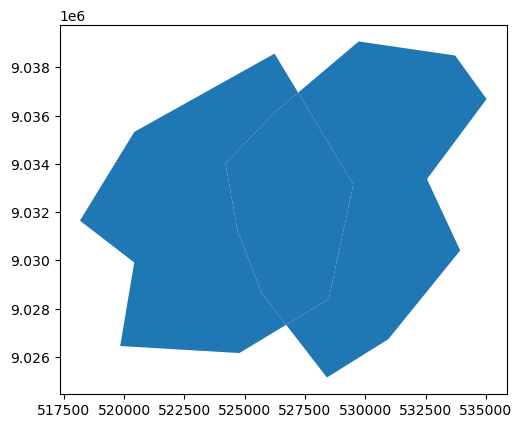

In [34]:
Union.plot()
plt.show()

In [35]:
len(Union)

3

In [36]:
Union.head()

,id_1,Nombre_1,id_2,Nombre_2,geometry
0,1.0,GEOMATICA,1.0,AMBIENTAL,"POLYGON ((527212.850 9036953.181, 529502.761 9..."
1,1.0,GEOMATICA,NaN,None,"POLYGON ((518169.178 9031646.819, 520422.957 9..."
2,NaN,None,1.0,AMBIENTAL,"POLYGON ((529724.934 9039074.242, 533720.637 9..."


In [37]:
# Conduct the aggregation
Union_disuelto = Union.dissolve(by=None)

<AxesSubplot:>

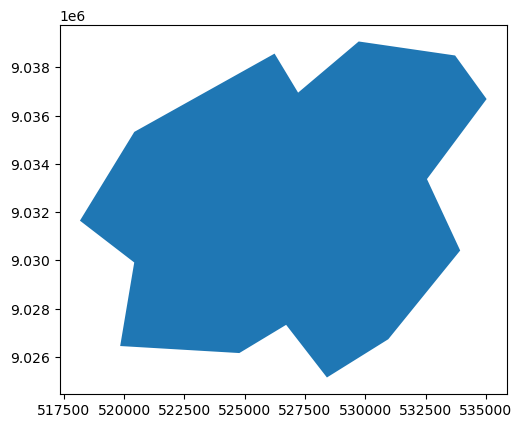

In [38]:
Union_disuelto.plot()

In [39]:
len(Union_disuelto)

1

## Diferencia simetrica

In [40]:
Diferencia_simetrica = gpd.overlay(poly1, poly2, how='symmetric_difference')

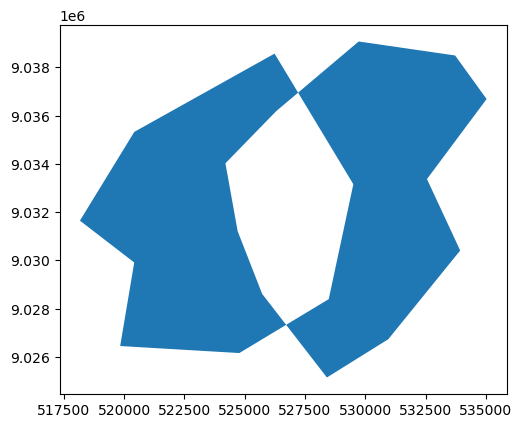

In [41]:
Diferencia_simetrica.plot()
plt.show()

In [42]:
len(Diferencia_simetrica)

2

## Diferencia

In [45]:
Diferencia_poly1 = gpd.overlay(poly1, poly2, how='difference')

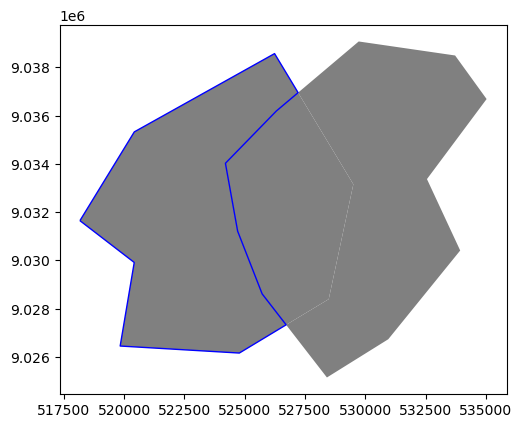

In [47]:
ax = Union.plot(facecolor='gray')
Diferencia_poly1.plot(ax=ax, facecolor='None', edgecolor='blue')
plt.show()

## Identidad

In [48]:
Identidad_poly2 = gpd.overlay(poly2, poly1, how='identity')

In [49]:
len(Identidad_poly2)

2

In [50]:
Identidad_poly2.head()

,id_1,Nombre_1,id_2,Nombre_2,geometry
0,1.0,AMBIENTAL,1.0,GEOMATICA,"POLYGON ((526716.516 9027328.692, 525722.284 9..."
1,1.0,AMBIENTAL,NaN,None,"POLYGON ((529724.934 9039074.242, 533720.637 9..."


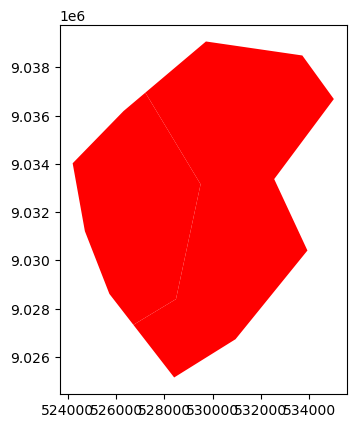

In [51]:
Identidad_poly2.plot(color="red")
plt.show()

In [119]:
# Save to disk
Identidad_poly2.to_file("Resultado/Identidad_poly2")